In [34]:
def drawfigure (result, toollist, ax, ax_row, ax_col, TITLE, **kwargs):
    import palettable
    import matplotlib
    import numpy as np
    import pandas as pd
    import seaborn as sns
    from scipy.stats import ttest_ind
    import itertools

    tabl = palettable.tableau.Tableau_20.mpl_colors
    safe7 = palettable.cartocolors.qualitative.Vivid_10.mpl_colors
    Gr_10 = palettable.scientific.sequential.GrayC_20.mpl_colors

    colorlist = [i for i in safe7]
    sns.set_style("white")
    #sns.set_palette("tab10")
    sns.set_palette(sns.color_palette(colorlist))

    font_dir = "/home/goldpm1/miniconda3/envs/cnvpytor/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/"
    font_dirs = matplotlib.font_manager.findSystemFonts(fontpaths=font_dir, fontext='ttf')
    for font in font_dirs:
        matplotlib.font_manager.fontManager.addfont(font)
    matplotlib.rcParams["font.family"] = 'arial'


    # Seaborn을 위해 df를 만들기
    df = pd.DataFrame (columns = ["tool", "score", "Y-index", "ARI", "NUM_CLONE_answer", "f1score", "runningtime"] )
    matrix = []
    for j, tool in enumerate( toollist ):
        for k in range (1, len(result.score_record[0]) ):
            matrix.append ( [tool, result.score_record[j][k], result.Yindex_record[j][k], result.ARI_record[j][k], result.NUM_CLONE_record[j][k], result.f1score_record[j][k], result.runningtime_record[j][k]] )

    df = (pd.DataFrame.from_records (matrix, columns = df.columns))

    #print (df)

    sns.boxplot (data = df, x = "tool", y = "score",  ax = ax[ax_row][ax_col], linewidth = 1)
    
    ax[ax_row][ax_col].set_xlabel("")
    ax[ax_row][ax_col].tick_params(axis = 'x', rotation = 35)
    ax[ax_row][ax_col].xaxis.label.set_fontsize(11)
    ax[ax_row][ax_col].yaxis.label.set_fontsize(13)

    xmin, xmax, ymin, ymax = ax[ax_row][ax_col].axis()
    ymax = (ymax - ymin) * 0.2 + ymax
    ax[ax_row][ax_col].axis ( [ xmin, xmax, ymin, ymax ]) 

    ax[ax_row][ax_col].set_title ( TITLE, y = 0.98, fontweight = "semibold", fontsize = 15, loc = "center")



/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/MRS_1D/500_0_0.0_0.0/M1-2_input
/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/MRS_1D/500_0_0.0_0.0/M1-5_input
/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/MRS_1D/500_0_0.0_0.0/M1-6_input
/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/MRS_1D/500_0_0.0_0.0/M1-7_input
/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/MRS_1D/500_0_0.0_0.0/M1-8_input
/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/MRS_1D/500_0_0.0_0.0/M2-10_input
/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/MRS_1D/500_0_0.0_0.0/M2-2_input
/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/MRS_1D/500_0_0.0_0.0/M2-4_input
/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/MRS_1D/500_0_0.0_0.0/M2-6_input
/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/MRS_1D/500_0_0.0_0.0/M2-8_input


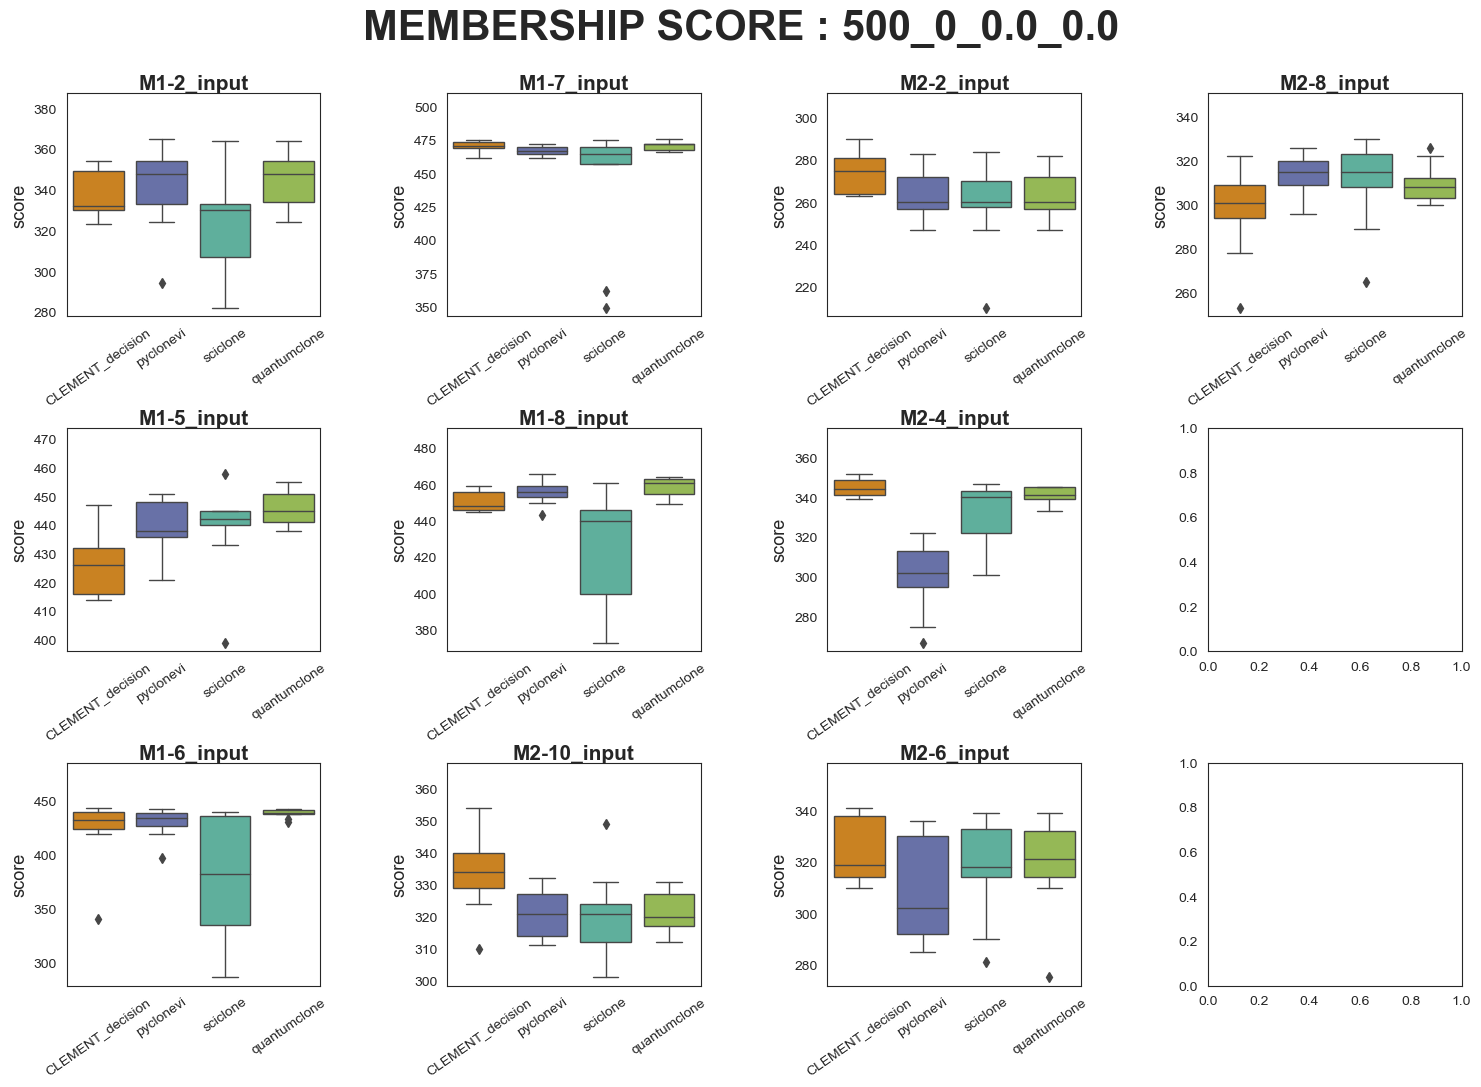

In [37]:
import numpy as np 
import pandas as pd
import os, glob
import matplotlib.pyplot

class ResultClass:
    def __init__(self, toollist, **kwargs):
        self.score_record = np.zeros ( ( len (toollist), kwargs["BENCHMARK_NO"] ), dtype = "int" )
        self.Yindex_record = np.zeros ( (len (toollist)  , kwargs["BENCHMARK_NO"] ), dtype = "float" )
        self.ARI_record = np.zeros ( (len (toollist)  , kwargs["BENCHMARK_NO"] ), dtype = "float" )
        self.NUM_CLONE_record = np.zeros ( (len (toollist) , kwargs["BENCHMARK_NO"] ), dtype = "int" )
        self.runningtime_record = np.zeros ( (len (toollist) , kwargs["BENCHMARK_NO"]  ), dtype = "float" )
        self.f1score_record = np.zeros ( (len (toollist) , kwargs["BENCHMARK_NO"] ), dtype = "float" )

    def acc (self, I, J, score, Yindex, ARI, NUM_CLONE_answer, runningtime, f1score):
        self.score_record[J , I] = score
        self.Yindex_record[J , I] = Yindex
        self.ARI_record[J , I] = ARI
        self.NUM_CLONE_record[J , I] = NUM_CLONE_answer
        self.runningtime_record[J , I] = runningtime
        self.f1score_record[J , I] = f1score





INPUT_DIR = "/data/project/Alzheimer/YSscript/EM_MRS/data/combinedoutput/MRS_1D/500_0_0.0_0.0"
INPUT_DIR_LIST = sorted (  glob.glob(INPUT_DIR + "/*") ) 

toollist = ["CLEMENT_decision", "pyclonevi", "sciclone", "quantumclone"]

kwargs={}
kwargs["BENCHMARK_NO"] = 10

####################################################################################################
if len (INPUT_DIR_LIST) > 15:
    NUM_ROW = 4
elif len (INPUT_DIR_LIST) > 9:
    NUM_ROW = 3

fig, ax = matplotlib.pyplot.subplots(nrows = NUM_ROW,  ncols = int (len(INPUT_DIR_LIST) / NUM_ROW) + 1, figsize = (18,NUM_ROW * 3.5))
fig.subplots_adjust (wspace = 0.5, hspace = 0.5, bottom = 0.05, top = 0.9)
fig.suptitle( "MEMBERSHIP SCORE : {}".format(INPUT_DIR.split("/")[-1]), fontsize = 30, fontweight = "bold")

####################################################################################################

for DIR_index, DIR in enumerate( INPUT_DIR_LIST) :
    result = ResultClass(toollist, **kwargs)
    
    print (DIR)
    
    num_row = 0
    for i in range (0, kwargs["BENCHMARK_NO"]):
        break_check = False
        for j, tool in enumerate( toollist ):
            try:
                inputdf = pd.read_csv ( DIR + "/" + str(i) + "/" + tool + ".results.txt", sep = "\t", header = None)
            except:
                break_check = True
                break

            for k in range (inputdf.shape[0]):
                if inputdf.iloc[k][0] == "score":
                    score = int ( inputdf.iloc[k][1].split("/")[0])
                if inputdf.iloc[k][0] == "Y-index":
                    Yindex = float ( inputdf.iloc[k][1] )
                if inputdf.iloc[k][0] == "ARI":
                    ARI = float ( inputdf.iloc[k][1] )
                if inputdf.iloc[k][0] == "NUM_CLONE":
                    NUM_CLONE_answer = int ( inputdf.iloc[k][1] )
                if inputdf.iloc[k][0] == "runningtime":
                    runningtime = int ( inputdf.iloc[k][1] )
                if inputdf.iloc[k][0] == "F1":
                    if inputdf.iloc[k][1] != "None":
                        f1score = float ( inputdf.iloc[k][1] )
                    else:
                        f1score = 0

            result.acc (num_row, j, score, Yindex, ARI, NUM_CLONE_answer, runningtime, f1score)
        if break_check == False:
            num_row = num_row + 1
         
    ax_row  = int (DIR_index % NUM_ROW)
    ax_col = int (DIR_index / NUM_ROW)
    TITLE = DIR.split("/")[-1]
    
    drawfigure (result, toollist, ax, ax_row, ax_col, TITLE, **kwargs)
    
#matplotlib.savefig(OUTPUT_FILENMAE)